M=0.9526109152006308 D=45.0
[((85.0, 41.0), 78.0), ((40.0, 52.0), 57.0), ((-18.0, 59.0), 57.0), ((97.0, 3.0), 71.0), ((11.0, 40.0), 59.0), ((33.0, 4.0), 69.0), ((-74.0, 39.0), 46.0), ((50.0, 54.0), 30.0), ((-8.0, 2.0), 56.0), ((-98.0, 22.0), 51.0)]

check 0.4763554576003154
start1 [(0, (85.0, 41.0), []), (1, (40.0, 52.0), [(14.53067670316371, 42.58942867130451), (37.437303948033005, 24.96894617525121)]), (2, (-18.0, 59.0), [(-29.180409163206576, 34.25644057790957), (5.08853401859743, 44.71137239608707)]), (3, (97.0, 3.0), []), (4, (11.0, 40.0), [(-17.05696231469455, 41.64204649864232), (35.951335376082795, 27.064764633678557)]), (5, (33.0, 4.0), [(26.661328914202556, 36.2515315611452), (0.3757752709206912, 0.0)]), (6, (-74.0, 39.0), []), (7, (50.0, 54.0), []), (8, (-8.0, 2.0), [(18.600825944824724, 0.0), (-34.60082594482472, 0.0)]), (9, (-98.0, 22.0), [])]
0 37.1557256928246 is out D
1 27.152261083217976 : checking
  check intersection (34.96549368225847, 25.318563980402892) 1 27.15226

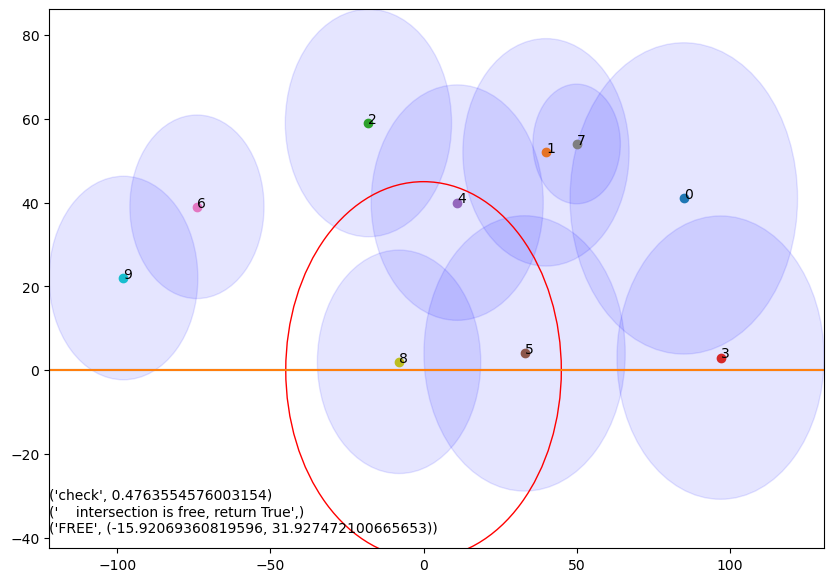

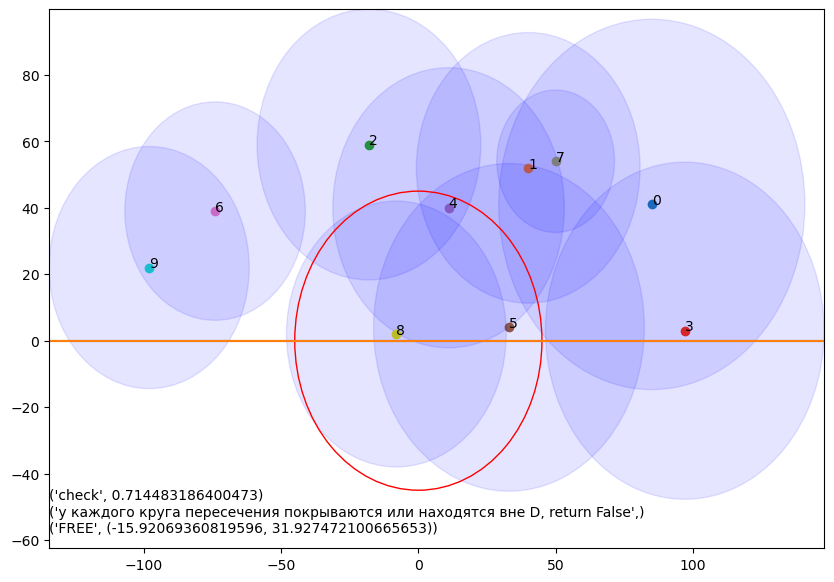

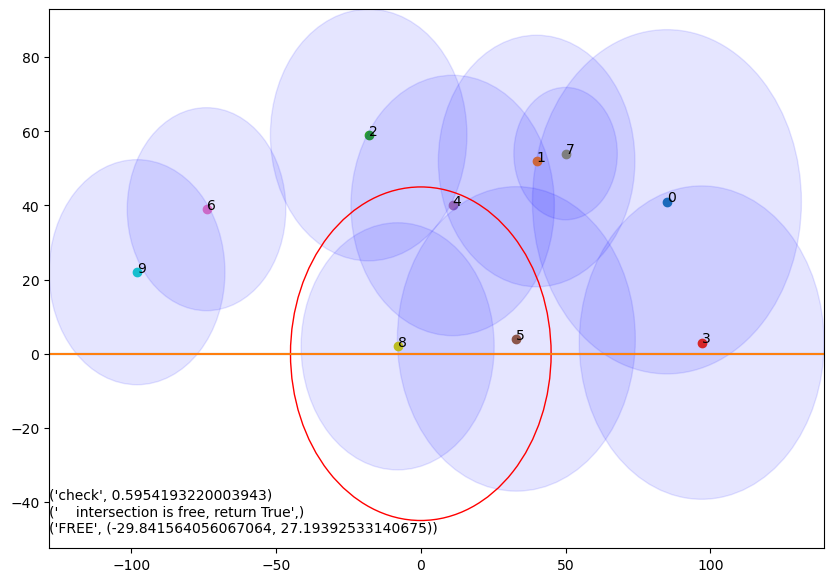

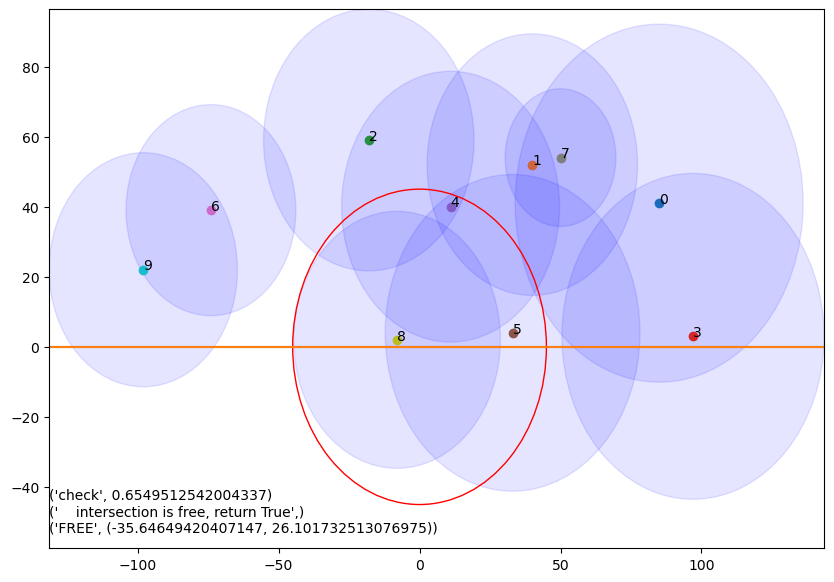

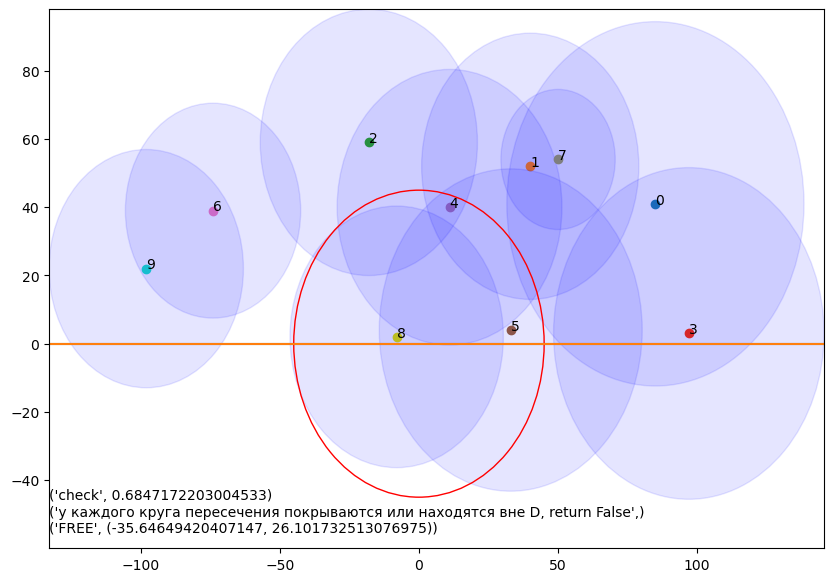

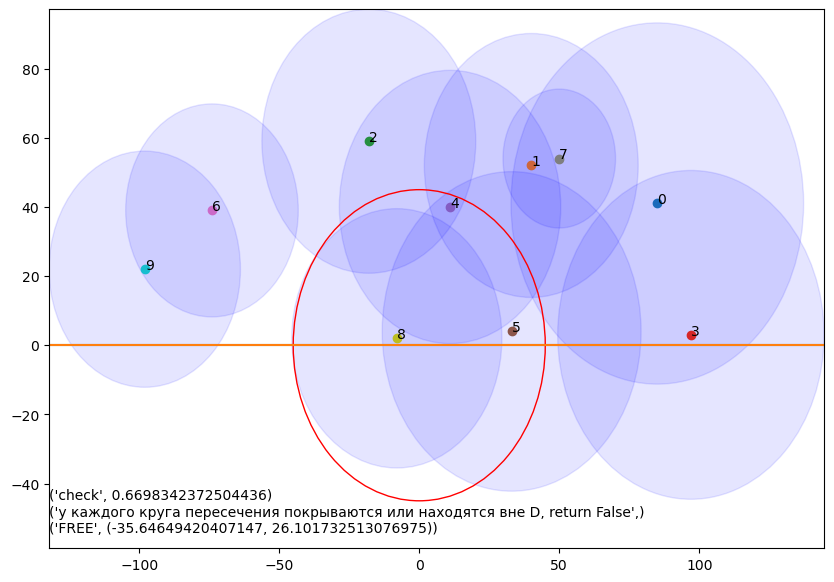

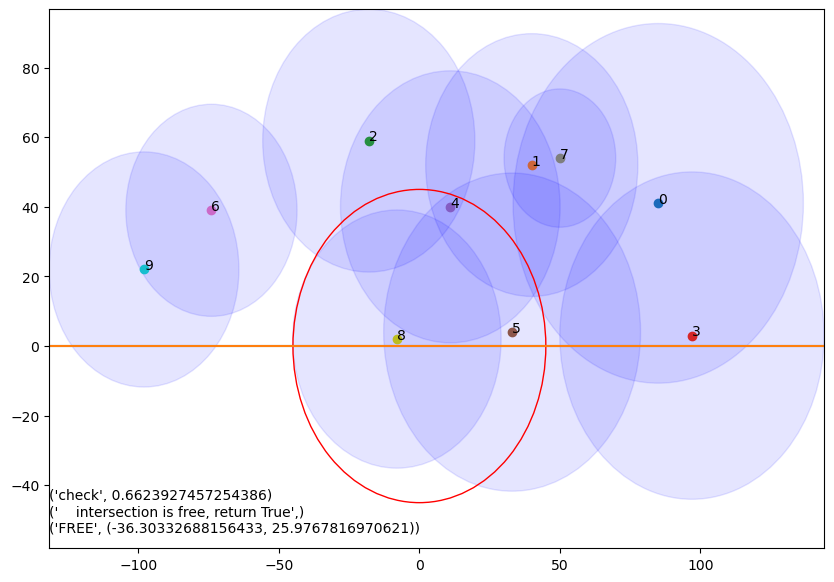

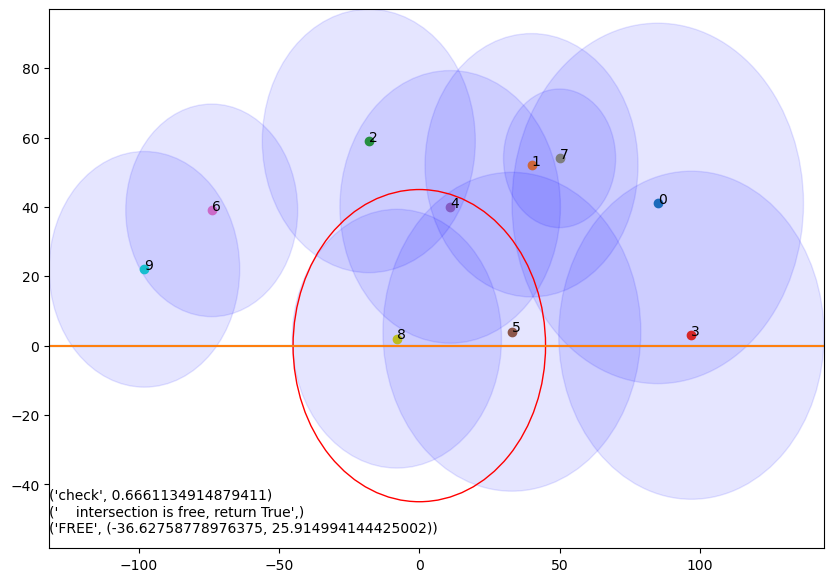

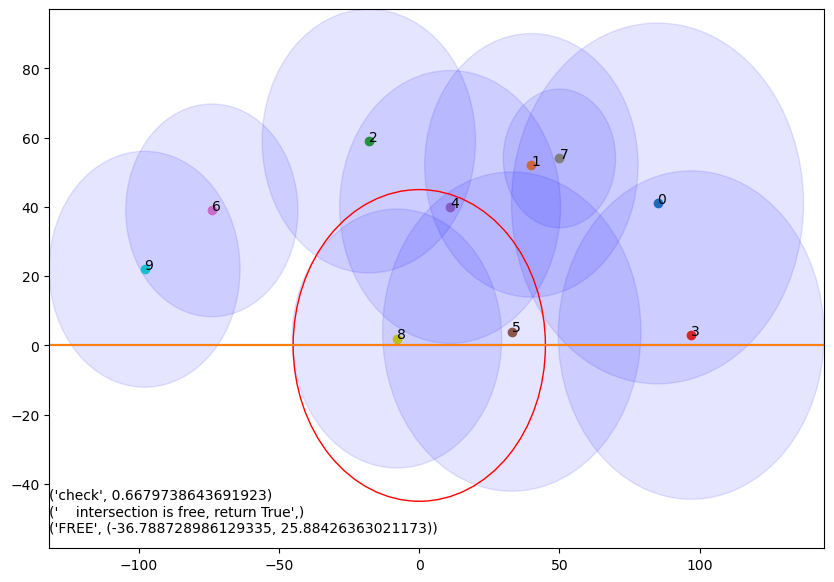

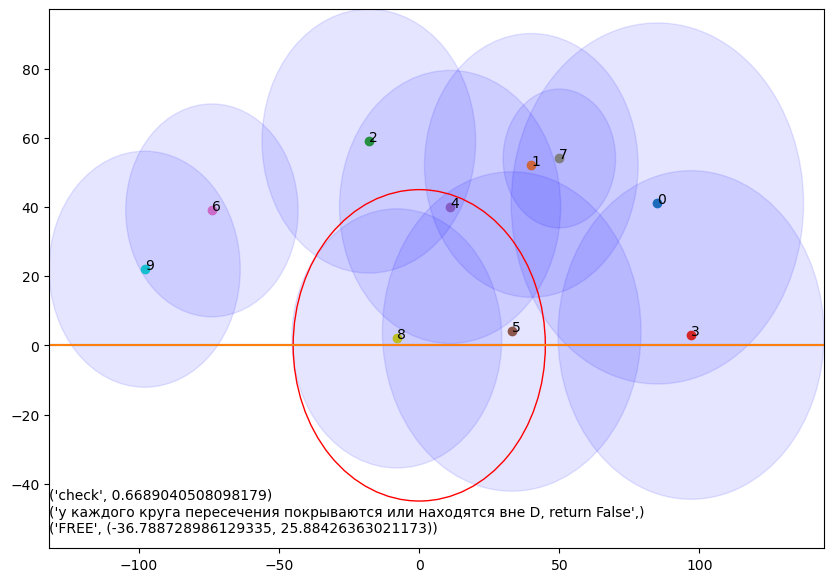

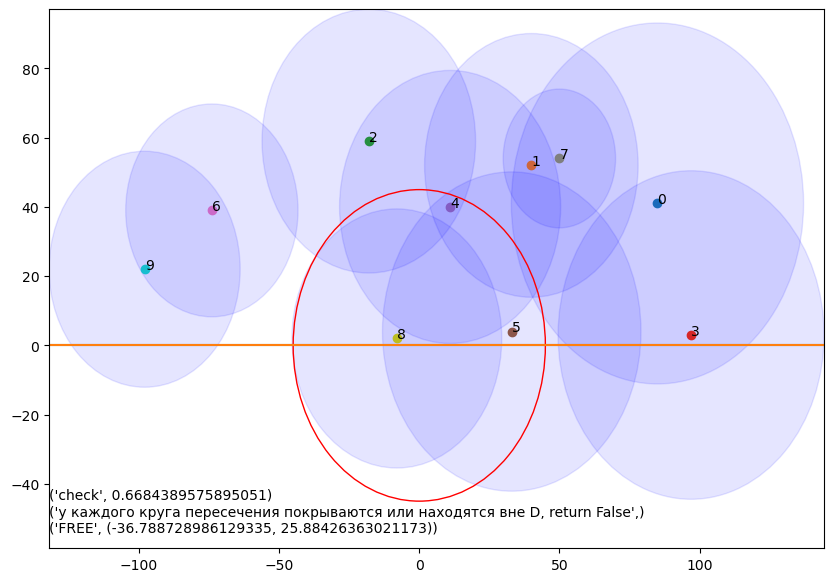

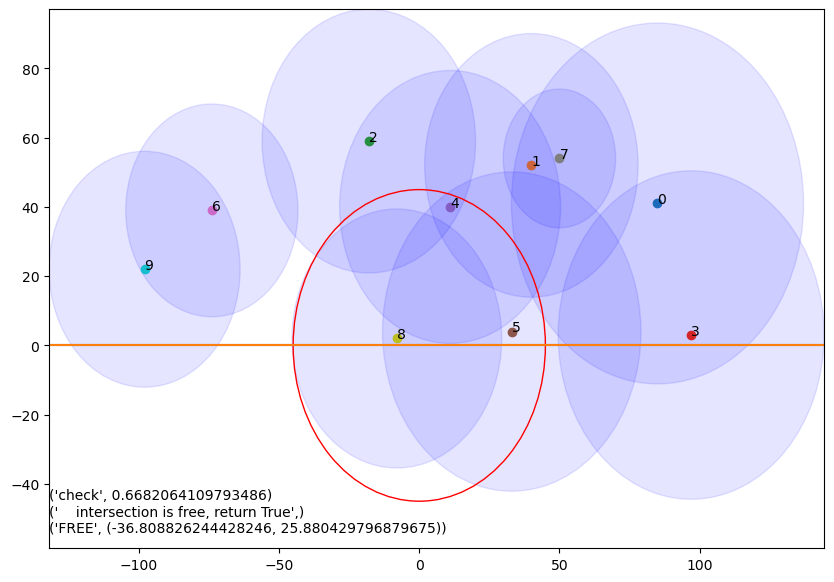

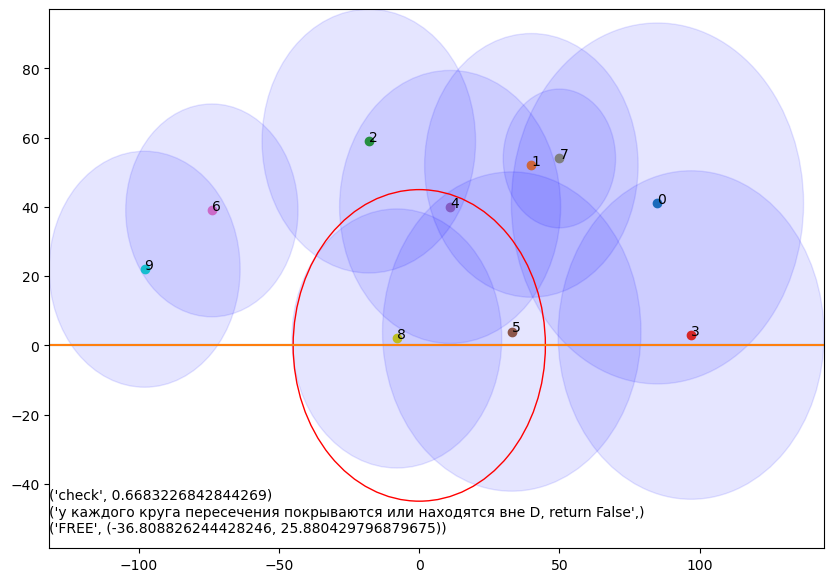

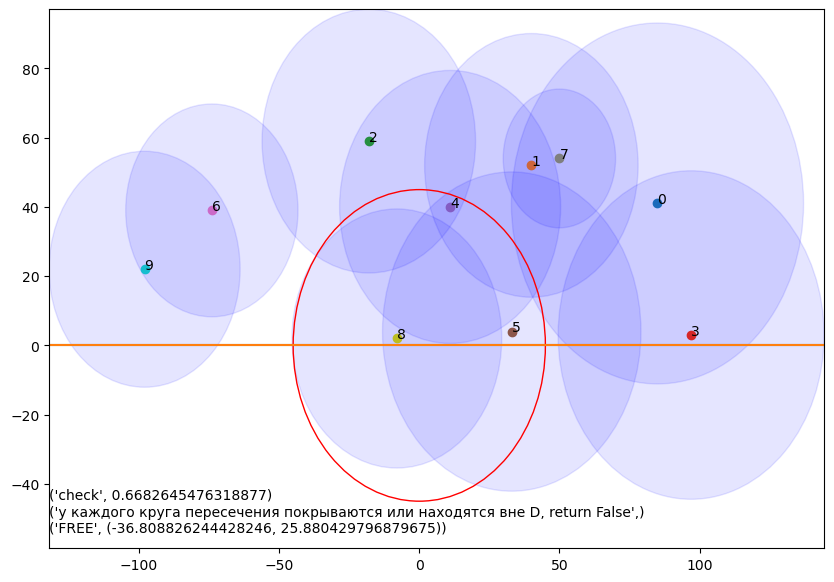

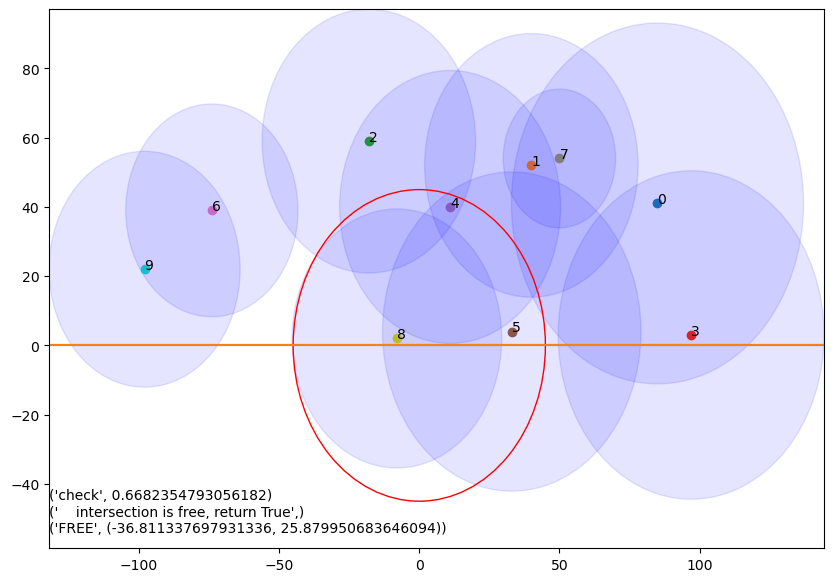

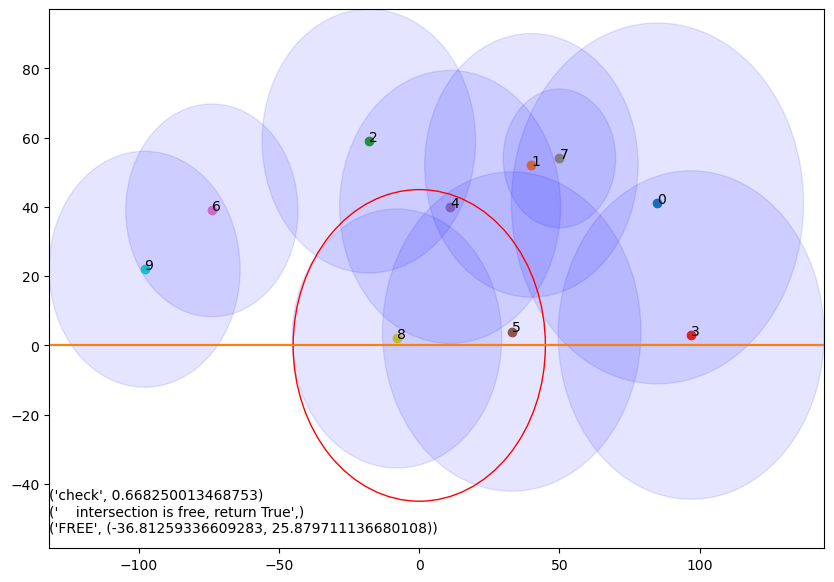

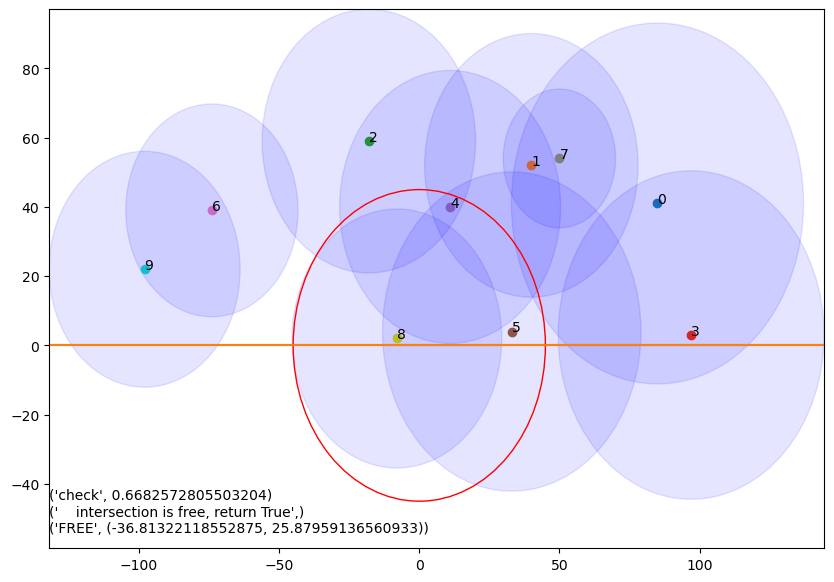

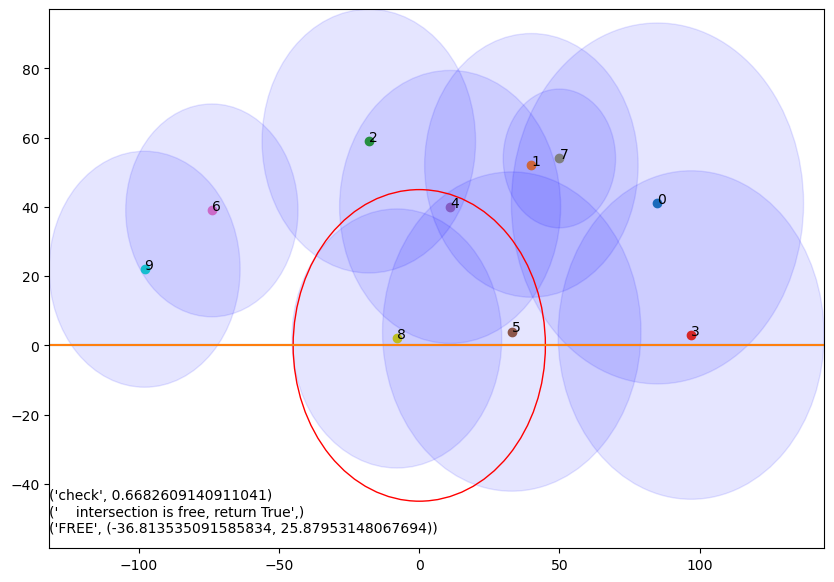

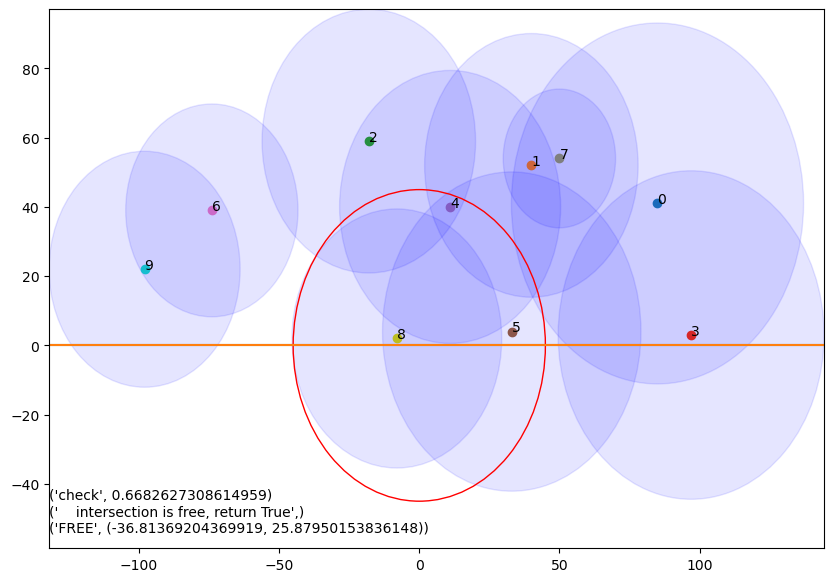

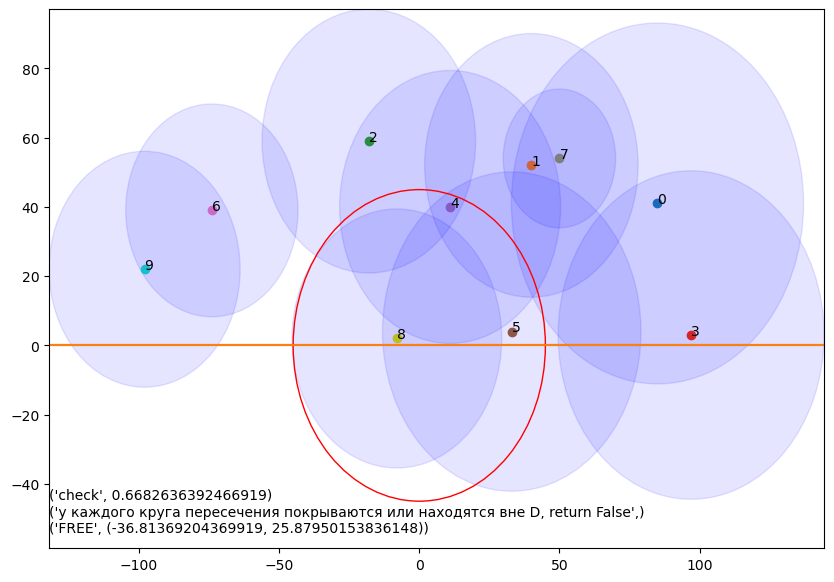

In [131]:
debug = 1

from math import *
	
def diff(p1,p2):
	x1,y1 = p1
	x2,y2 = p2
	return x2-x1, y2-y1
def sq_dist(p1,p2):
	dx,dy = diff(p1,p2)
	return dx**2 + dy**2
if debug>2: 
	print(f'{sq_dist((0.,0.),(3.,4.))=}')

def c_rel_c(c1,r1,c2,r2):
	sqd = sq_dist(c1,c2)
	if sqd<=(r2-r1)**2:
		if r2>r1:
			return '1in2'
		else:
			return '2in1'
	if sqd>(r2+r1)**2:
		return 'out'
	return 'inter'
if debug>2:
	print(f'{c_rel_c((0.,0.),2.,(0.,1.),0.5)=}')
	print(f'{c_rel_c((0.,0.),2.,(0.,1.),3. )=}')
	print(f'{c_rel_c((0.,0.),2.,(0.,1.),2. )=}')
	print(f'{c_rel_c((0.,0.),2.,(5.,0.),1. )=}')
def intersections(c1,r1,c2,r2):
	x1,y1 = c1
	x2,y2 = c2
	d = sqrt(sq_dist(c1,c2))
	a = (r1**2-r2**2+d**2)/2/d
	h = sqrt(r1**2-a**2)
	x0 = x1 + a * (x2 - x1) / d
	y0 = y1 + a * (y2 - y1) / d
	x3 = x0 + h * (y2 - y1) / d
	y3 = y0 - h * (x2 - x1) / d
	x4 = x0 - h * (y2 - y1) / d
	y4 = y0 + h * (x2 - x1) / d
	return (x3,y3),(x4,y4)
if debug>2:
	print(f'{intersections((0.,0.),2.,( 0., 1.),2. )=}')
	print(f'{intersections((0.,0.),2.,( 0.,-1.),2. )=}')
	print(f'{intersections((0.,0.),2.,( 1., 0.),2. )=}')
	print(f'{intersections((0.,0.),2.,(-1., 0.),2. )=}')
	print(f'{intersections((0.,0.),1.,( 1., 1.),1. )=}')

class Circle:
	__slots__ = ['c','v','r','rel','cd']
	def __init__(self,c,v):
		self.c = c
		self.v = v
	def __repr__(self):
		return repr((self.c,self.v))
	def cr(self):
		return self.c, self.r

with open("input.txt", "r") as F:
	D,N = F.readline().split()
	D = float(D)
	N = int(N)
	circs = []
	M = 1e20
	skipped = 0
	for i in range(N):
		s = F.readline()
		if s.startswith('#'):
			skipped+=1
			continue
		x,y,v = map(float, s.split())
		M = min(M,(sqrt(x**2+y**2)+D+0.1)/v)
		circs.append(Circle((x,y),v))
	N-=skipped
if debug: print(f'{M=} {D=}')

def p_in_D(p):
	return p[1]>=0 and p[0]**2+p[1]**2<=D**2
def c_rel_D(c1,r1):
	rel = c_rel_c(c1,r1,(0.,0.),D)
	if rel=='out':
		return 'out',[]
	if rel=='1in2':
		if c1[1]-r1>=0:
			return 'СinD',[]
		elif c1[1]+r1<=0:
			return 'out',[]
		else:
			x1 = c1[0] + sqrt(r1**2-c1[1]**2)
			x2 = c1[0] - sqrt(r1**2-c1[1]**2)
			return 'inter',[(x1,0.),(x2,0.)]
	if rel=='2in1':
		return 'DinC',[]
	assert rel=='inter'
	p1,p2 = intersections(c1,r1,(0.,0.),D)
	if p1[1]>=0 and p2[1]>=0:
		if c1[1]-r1>0 or abs(c1[0])>D:
			return 'inter',[p1,p2]
		else:
			x1 = c1[0] + sqrt(r1**2-c1[1]**2)
			x2 = c1[0] - sqrt(r1**2-c1[1]**2)
			return 'inter',[p1,p2,(x1,0.),(x2,0.)]
	elif p1[1]<0 and p2[1]<0:
		if c1[1]+r1<=0:
			return 'out',[]
		else:
			x1 = c1[0] + sqrt(r1**2-c1[1]**2)
			x2 = c1[0] - sqrt(r1**2-c1[1]**2)
			if abs(x1)>D and abs(x2)>D:
				return 'DinC',[]
			assert abs(x1)<=D and abs(x2)<=D
			return 'inter',[(x1,0.),(x2,0.)]
	else:
		x1 = c1[0] + sqrt(r1**2-c1[1]**2)
		x2 = c1[0] - sqrt(r1**2-c1[1]**2)
		if abs(x1)<D:
			assert abs(x2)>=D
			x = x1
		else:
			assert abs(x2)<D
			x = x2
		if p1[1]>=0:
			return 'inter' , [p1 , (x,0.)]
		assert p2[1]>=0
		return 'inter' , [p2 , (x,0.)]
if debug>2:
	print(f'{c_rel_D((0.,12.),1.)=}')
	print(f'{c_rel_D((0., 8.),1.)=}')
	print(f'{c_rel_D((0.,-8.),1.)=}')
	print(f'{c_rel_D((0., 0.),1.)=}')
	print(f'{c_rel_D((0., 0.),11.)=}')
	print(f'{c_rel_D((0., 5.),6.)=}')
	print(f'{c_rel_D((0., 9.),2.)=}')
	print(f'{c_rel_D((0.,-9.),2.)=}')
	print(f'{c_rel_D((0., 5.),12.)=}')
	print(f'{c_rel_D((0.,-5.),6.)=}')
	print(f'{c_rel_D((-10.,0.),2.)=}')

if debug: 
	print(circs)
	import matplotlib.pyplot as plt
	

FREE = (0.,0.)
if debug:
	text = ''
	lines = 0
def iprint(*s):
	print(*s)
	if debug:
		global text, lines
		text += str(s)+'\n'
		lines+=1


def wrap(check):
	def foo(T):
		plt.figure(figsize=(10,7))
		xmax = D
		xmin = -D
		ymax = D
		ymin = 0
		for ic in range(N):
			(x,y) = circs[ic].c
			r = circs[ic].v*T
			xmax = max(xmax,x+r)
			xmin = min(xmin,x-r)
			ymax = max(ymax,y+r)
			ymin = min(ymin,y-r)
			plt.gca ().add_artist ( plt.Circle ((x,y), radius= r , color='blue', alpha= .1) )
			plt.scatter(x,y)
			plt.annotate(str(ic), xy=(x,y))
		plt.gca ().add_artist (plt.Circle ((0,0), radius= D , color='red', fill=False) )
		plt.plot([xmin,xmax],[0,0])

		global text, lines
		text = ''
		lines= 0
		#iprint(xmin,xmax,ymin,ymax)
		
		try:
			tmp = check(T)
		finally:
			iprint('FREE',FREE)
	
			ymin-=lines/30*(ymax-ymin)
			plt.axis([xmin,xmax,ymin,ymax])
			plt.plot([xmin,xmax],[0,0])
			#plt.axis ("equal")
			plt.annotate(text, xy=(xmin,ymin))

		return tmp
			
	if debug:
		return foo
	else:
		return check
@wrap
def check(T):
	if debug: 
		print()
		iprint('check',T)
	global FREE
	Disopen = True
	for ic1 in range(N):
		circs[ic1].r = circs[ic1].v*T
		circs[ic1].rel,circs[ic1].cd = c_rel_D(*circs[ic1].cr())
		if circs[ic1].rel=='DinC':
			if debug: iprint(ic1,circs[ic1].r,'covers all D, return False')
			return 1 # накрывает полностью, нет свободного места
		elif circs[ic1].rel!='out':
			Disopen = False
	if Disopen:
		if debug: iprint('D ни с кем не пересекается, return True')
		FREE = (0.,0.)
		return 0
	if debug: print('start1',[(ic,circs[ic].c,circs[ic].cd) for ic in range(N)])

	for ic1 in range(N):
		c1,r1 = circs[ic1].cr()
		c1relD = circs[ic1].rel
		if c1relD=='out':
			if debug: print(ic1,r1,'is out D')
			continue
		else:
			if debug: print(ic1,r1,': checking')
		# c1,r1 пересекается (как круг) с D, но накрывает его не полностью, т.е. CinD или inter
		# причем найдется по крайней мере один такой круг
		c1isopen = True
		for ic2 in range(N):
			if ic2==ic1 or circs[ic2].rel=='out': # тех кто снаружи D мы не рассматриваем
				continue
			c2,r2 = circs[ic2].cr()
			rel12 = c_rel_c(c1,r1,c2,r2)
			if rel12=='2in1' or rel12=='out': # тех кто снаружи или внутри 1го мы не рассматриваем
				#if debug: print(' ',ic2,r2,'is inside or outside ',ic1,r1)
				continue
			c1isopen = False # с кем-то пересекается, кто также пересекается с D

			if circs[ic1].cd: # todo переписать чтобы массив не удалялся-создавался, а оставался-менялся
				out_points = []
				for p in circs[ic1].cd:
					if sq_dist(p,c2)>=r2**2:
						out_points.append(p)
				circs[ic1].cd = out_points
			if rel12=='1in2':
				if debug: print(' ',ic2,r2,'covers',ic1,r1)
				break
			cross1,cross2 = intersections(c1,r1,c2,r2)
			both_outside = True
			if p_in_D(cross1):
				both_outside = False
				if debug: print('  check intersection',cross1,ic1,r1,ic2,r2)
				for ic3 in range(N): # точка должна оказаться снаружи всех остальных кругов
					if ic3==ic1 or ic3==ic2 or circs[ic3].rel=='out':
						continue
					c3,r3 = circs[ic3].cr()
					if sq_dist(c3,cross1)<r3**2:
						if debug: print('    intersection in',ic3,r3)
						break # пересечение покрывается другим кругом
				else:
					if debug: iprint('    intersection is free, return True')
					FREE = cross1
					return 0
			if p_in_D(cross2):
				both_outside = False
				if debug: print('  check intersection',cross2,ic1,r1,ic2,r2)
				for ic3 in range(N): # точка должна оказаться снаружи всех остальных кругов
					if ic3==ic1 or ic3==ic2 or circs[ic3].rel=='out':
						continue
					c3,r3 = circs[ic3].cr()
					if sq_dist(c3,cross2)<r3**2:
						if debug: print('    intersection in',ic3,r3)
						break # пересечение покрывается другим кругом
				else:
					if debug: iprint('    intersection is free, return True')
					FREE = cross2
					return 0
			if both_outside:
				if len(circs[ic1].cd)==0:
					if debug: print('  открытая часть полностью покрыта')
					break
		if c1isopen:
			if c1relD=='CinD':
				if debug: iprint(' ',ic1,r1,'is totally free, return True')
				FREE = (c1[0],c1[1]+r1)
			else:
				if debug: iprint(' ',ic1,r1,'intersects only D, return True')
				FREE = circs[ic1].cd[0]
			return 0
		assert len(circs[ic1].cd)!=1, (ic1,circs[ic1].cd)
		if len(circs[ic1].cd):
			if debug: iprint(' ',ic1,r1,'has free part, return True')
			FREE = circs[ic1].cd[0]
			return 0
			
	if debug: iprint('у каждого круга пересечения покрываются или находятся вне D, return False')
	return 1


def upper_bound(first,last, check):
	count = last-first
	while count > 0.000001:
		step = count / 2; 
		it = first+step
		if check(it) <= 0:
			first = it;
			count = step
		else:
			count = step
	return first

if 0:
	print(c_rel_D((85.0, 41.0),0.714483*78.0))
	#print(check(0.714483),FREE)
else:
	print(upper_bound(0.0001,M, check)-0.0000001)
	print(FREE[0],FREE[1])
